In [62]:
#import all the necessary libraries for the analysis

import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
os.getcwd()

# import all stock market data into DataFrame
nsei=pd.read_csv(r"C:\Users\sudhe\OneDrive\Desktop\Woking Folder for NF50 Modelling\^NSEI.csv",index_col=0)
nikkei=pd.read_csv(r"C:\Users\sudhe\OneDrive\Desktop\Woking Folder for NF50 Modelling\^N225.csv",index_col=0)
nasdaq=pd.read_csv(r"C:\Users\sudhe\OneDrive\Desktop\Woking Folder for NF50 Modelling\^IXIC.csv",index_col=0)
hsi=pd.read_csv(r"C:\Users\sudhe\OneDrive\Desktop\Woking Folder for NF50 Modelling\^HSI.csv",index_col=0)
# next step is to change S&P and DJI formats and save the excel
hsi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
01-08-2016,22027.65039,22260.94922,22027.65039,22129.14063,22129.14063,1.815980e+09
02-08-2016,NaN,NaN,NaN,NaN,NaN,NaN
03-08-2016,21743.32031,21822.22070,21725.38086,21739.11914,21739.11914,1.685375e+09
04-08-2016,21873.35938,21922.41992,21788.31055,21832.23047,21832.23047,1.019502e+09
05-08-2016,21961.05078,22193.28906,21961.05078,22146.08984,22146.08984,1.163974e+09


In [63]:
# Due to the timezone issues, we extract and calculate appropriate stock market data for analysis
# Indicepanel is the DataFrame of our trading model
indicepanel=pd.DataFrame(index=nsei.index)

indicepanel['nsei']=nsei['Open'].shift(-1)-nsei['Open']
indicepanel['nsei_lag1']=indicepanel['nsei'].shift(1)
#indicepanel['sp500']=sp500["Open"]-sp500['Open'].shift(1)
indicepanel['nasdaq']=nasdaq['Open']-nasdaq['Open'].shift(1)
indicepanel['nasdaq1']=nasdaq['Close']-nasdaq['Open']
#indicepanel['dji']=dji['Open']-dji['Open'].shift(1)

indicepanel['hsi']=(hsi['Open']-hsi['Open'].shift(1))
indicepanel['nikkei']=(nikkei['Open']-nikkei['Open'].shift(1))

indicepanel['hsi_adv']=(hsi['Open']-hsi['Open'].shift(1)).shift(-1)
indicepanel['nikkei_adv']=(nikkei['Open']-nikkei['Open'].shift(1)).shift(-1)

indicepanel['Price']=nsei['Open']

indicepanel.head()


,nsei,nsei_lag1,nasdaq,nasdaq1,hsi,nikkei,hsi_adv,nikkei_adv,Price
Date,,,,,,,,,
01-08-2016,-6.849610,NaN,NaN,16.780273,NaN,NaN,NaN,54.36914,8654.299805
02-08-2016,-12.250000,-6.84961,10.109863,-39.799805,NaN,54.36914,NaN,-242.39942,8647.450195
03-08-2016,-35.250000,-12.25000,-44.289551,26.500000,NaN,-242.39942,130.03907,-58.94043,8635.200195
04-08-2016,0.250000,-35.25000,24.779786,8.229980,130.03907,-58.94043,87.69140,110.65039,8599.950195
05-08-2016,112.649414,0.25000,32.689941,30.410156,87.69140,110.65039,363.12891,183.29883,8600.200195


In [64]:
# Lets check whether do we have NaN values in indicepanel
indicepanel.isnull().sum()

nsei          13
nsei_lag1     13
nasdaq        38
nasdaq1       37
hsi           63
nikkei        95
hsi_adv       63
nikkei_adv    98
Price          6
dtype: int64

In [65]:
# We can use method 'fillna()' from dataframe to FORWARD FILLING the NaN values
# Then we can drop the reminding NaN values
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()

In [66]:
# Lets check whether do we have Nan values in indicepanel now
indicepanel.isnull().sum()

nsei          0
nsei_lag1     0
nasdaq        0
nasdaq1       0
hsi           0
nikkei        0
hsi_adv       0
nikkei_adv    0
Price         0
dtype: int64

In [67]:
# save this indicepanel for part 4.5
path_save = r'C:\Users\sudhe\OneDrive\Desktop\Woking Folder for NF50 Modelling\indicepanel.csv'
indicepanel.to_csv(path_save)

In [68]:
print(indicepanel.shape)

(1258, 9)


In [69]:
#split the data into (1)train set and (2)test set
path_save = r'C:\Users\sudhe\OneDrive\Desktop\Woking Folder for NF50 Modelling\indicepanel.csv'
indicepanel.to_csv(path_save)
Train = indicepanel.iloc[-1200:-600, :]
Test = indicepanel.iloc[-600:, :]
print(Train.shape, Test.shape)
Test.head()

(600, 9) (600, 9)


,nsei,nsei_lag1,nasdaq,nasdaq1,hsi,nikkei,hsi_adv,nikkei_adv,Price
Date,,,,,,,,,
05-04-2019,65.94922,-21.79981,20.250000,24.180175,165.15039,18.45118,169.16016,157.41015,11638.40039
08-04-2019,-92.29980,65.94922,10.380371,28.989746,169.16016,157.41015,-53.58985,-150.26172,11704.34961
09-04-2019,34.79980,-92.29980,-0.120117,-15.490235,-53.58985,-150.26172,-13.72070,-170.60937,11612.04981
10-04-2019,-54.29980,34.79980,-2.040040,41.510254,-13.72070,-170.60937,85.87110,82.97070,11646.84961
11-04-2019,20.29980,-54.29980,52.470215,-27.840332,85.87110,82.97070,-331.79102,119.69922,11592.54981


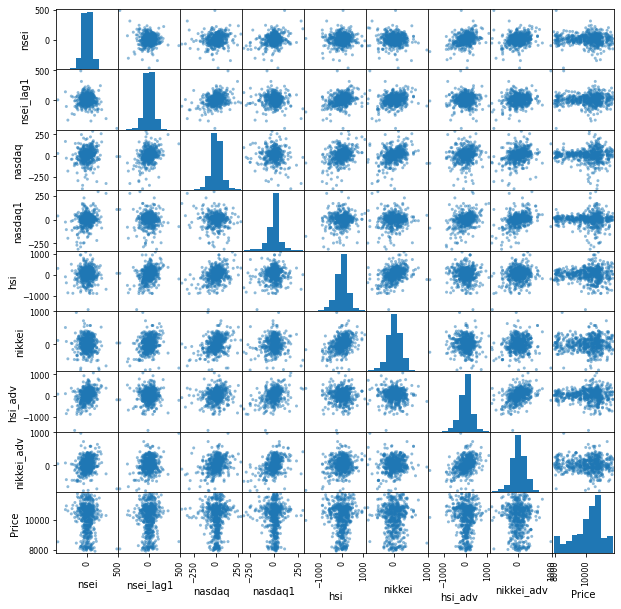

In [70]:
# Generate scatter matrix among all stock markets (and the points of nsei) to observe the association
sm=pd.plotting.scatter_matrix(Train,figsize=(10,10))
#from pandas.tools.plotting import scatter_matrix
#sm = scatter_matrix(Train, figsize=(10, 10))

In [71]:
# Find the indice with largest correlation
corr_array = Train.iloc[:, :-1].corr()['nsei']
print(corr_array)

nsei          1.000000
nsei_lag1    -0.065630
nasdaq        0.133317
nasdaq1       0.266937
hsi           0.042594
nikkei       -0.050332
hsi_adv       0.343914
nikkei_adv    0.212946
Name: nsei, dtype: float64


In [72]:
formula = 'nsei~nsei_lag1+nasdaq+nasdaq1+hsi+nikkei'
lm = smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   nsei   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     16.26
Date:                Wed, 08 Sep 2021   Prob (F-statistic):           4.77e-15
Time:                        13:15:16   Log-Likelihood:                -3467.7
No. Observations:                 600   AIC:                             6947.
Df Residuals:                     594   BIC:                             6974.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1492      3.225      1.597      0.111      -1.184      11.482
nsei_lag1     -0.0974      0.042     -2.317      0.021      -0.180      -0.015
nasdaq         0.2552      0.050      5.152      0.000       0.158       0.352
nasdaq1        0.3815      0.052      7.326      0.000       0.279       0.484
hsi            0.0048      0.013      0.373      0.709      -0.020       0.030
nikkei        -0.0532      0.017     -3.048      0.002      -0.088      -0.019
==============================================================================
Omnibus:                       88.089   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              500.979
Skew:                          -0.487   Prob(JB):                    1.64e-109
Kurtosis:                       7.369   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
#Make Prediction

Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)



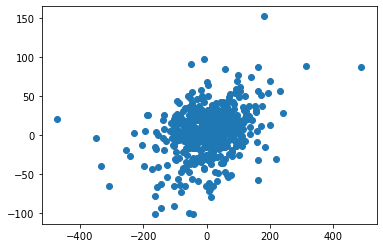

In [74]:
plt.scatter(Train['nsei'],Train['PredictedY'])

In [75]:
#Perforamce mesasurement using statistical paramenter RMSE,Adjusted R^2
# RMSE - Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
    data['yhat'] = model.predict(data)
    SST = ((data[yname] - data[yname].mean())**2).sum()
    SSR = ((data['yhat'] - data[yname].mean())**2).sum()
    SSE = ((data[yname] - data['yhat'])**2).sum()
    r2 = SSR/SST
    adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] -model_k -1)
    RMSE = (SSE/(data.shape[0] -model_k -1))**0.5
    return adjustR2, RMSE


def assessTable(test, train, model, model_k, yname):
    r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
    r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
    assessment = pd.DataFrame(index=['R2', 'RMSE'], columns=['Train', 'Test'])
    assessment['Train'] = [r2train, RMSEtrain]
    assessment['Test'] = [r2test, RMSEtest]
    return assessment

# Get the assement table fo our model
assessTable(Test, Train, lm, 7,'nsei')

,Train,Test
R2,0.109993,0.115222
RMSE,78.828485,151.486388


In [76]:
# Train data
Train['Order'] = [1 if sig>0 else -1 for sig in Train['PredictedY']]
Train['Profit'] = Train['nsei'] * Train['Order']

Train['Wealth'] = Train['Profit'].cumsum()
print('Total profit made in Train: ', Train['Profit'].sum())

Total profit made in Train:  12154.741119000028


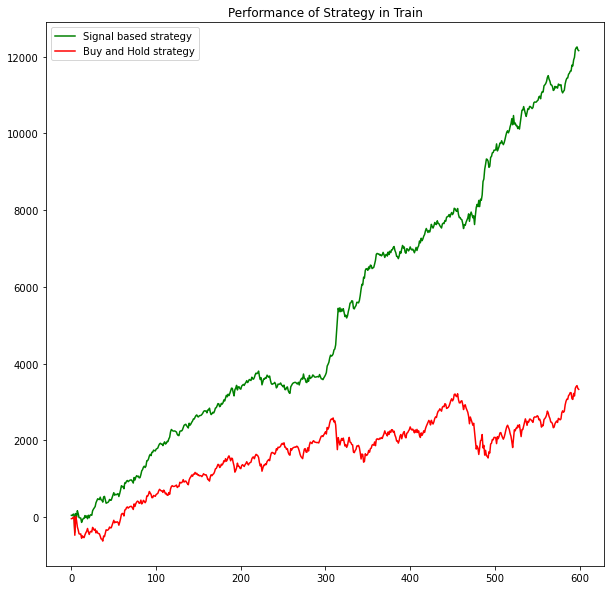

In [77]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Train['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Train['nsei'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [78]:
# Test
Test['Order'] = [1 if sig>0 else -1 for sig in Test['PredictedY']]
Test['Profit'] = Test['nsei'] * Test['Order']

Test['Wealth'] = Test['Profit'].cumsum()
print('Total profit made in Test: ', Test['Profit'].sum())

Total profit made in Test:  20788.38198599995


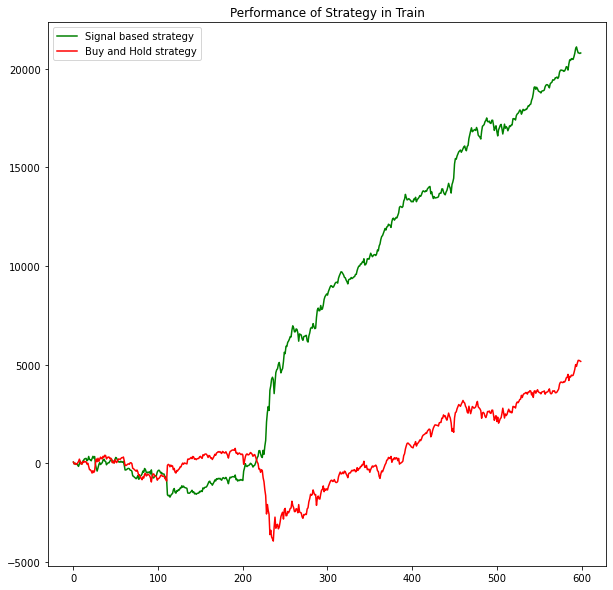

In [79]:
plt.figure(figsize=(10, 10))
plt.title('Performance of Strategy in Train')
plt.plot(Test['Wealth'].values, color='green', label='Signal based strategy')
plt.plot(Test['nsei'].cumsum().values, color='red', label='Buy and Hold strategy')
plt.legend()
plt.show()

In [80]:
Train['Wealth'] = Train['Wealth'] + Train.loc[Train.index[0], 'Price']
Test['Wealth'] = Test['Wealth'] + Test.loc[Test.index[0], 'Price']

# Sharpe Ratio on Train data
Train['Return'] = np.log(Train['Wealth']) - np.log(Train['Wealth'].shift(1))
dailyr = Train['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.22717785148077346
Yearly Sharpe Ratio is  3.6063365904005593


In [81]:
# Sharpe Ratio in Test data
Test['Return'] = np.log(Test['Wealth']) - np.log(Test['Wealth'].shift(1))
dailyr = Test['Return'].dropna()

print('Daily Sharpe Ratio is ', dailyr.mean()/dailyr.std(ddof=1))
print('Yearly Sharpe Ratio is ', (252**0.5)*dailyr.mean()/dailyr.std(ddof=1))

Daily Sharpe Ratio is  0.17157523393326332
Yearly Sharpe Ratio is  2.7236724007508717


In [82]:
# Maximum Drawdown in Train data
Train['Peak'] = Train['Wealth'].cummax()
Train['Drawdown'] = (Train['Peak'] - Train['Wealth'])/Train['Peak']
print('Maximum Drawdown in Train is ', Train['Drawdown'].max())

Maximum Drawdown in Train is  0.05482455890986412


In [83]:
# Maximum Drawdown in Test data
Test['Peak'] = Test['Wealth'].cummax()
Test['Drawdown'] = (Test['Peak'] - Test['Wealth'])/Test['Peak']
print('Maximum Drawdown in Test is ', Test['Drawdown'].max())

Maximum Drawdown in Test is  0.17220910985980076


In [84]:
path_save = r'C:\Users\sudhe\OneDrive\Desktop\Woking Folder for NF50 Modelling\Test.csv'
Test.to_csv(path_save)